In [23]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pandas as pd 

In [9]:
df = pd.read_excel('issf061219.xlsx', skiprow=1, header=1)# 1. Zeile nicht einlesen,2. = Spaltenüberschriften
# https://databraineo.de/ki-training-resources/python/datenimport-in-python-excel-dateien-einlesen-und-schreiben/
# in SAP BW: eigenes Bookmark definiert und damit die Daten abgezogen

In [28]:
# alle Spalten umbenennen - 33 Spalten in der Tabelle
df.columns = [ 
    'Status',
    'Date_Forcast_Start',
    'Date_Opp_Creation',
    'EndCl_Nr', 
    'EndCl_Name', 
    'EP', 
    'Date_Opp_End', 
    'Date_Last_Change', 
    'Date_Opp_Won',
    'Debitor',
    'Debitor_name',
    'Date_Decision',
    'Date_Last_Update',
    'PC_L_3',
    'PC_L_4',
    'PC_L_5',
    'PC_L_6',
    'Sector',
    'Segment',
    'Service_Solution',
    'Solution_Cluster',
    'Solution_Line',
    'Solution',
    'Sub_Solution',
    'Opp_Nr',
    'Opp_Name',
    'TOP_Account',
    'SalesStage',
    'Recurring_Indi',
    'Anzahl_Opp',
    'EUR_NetSales',
    'EUR_Actuals',
    'FC_current_FY',
    ]


In [29]:
df

,Status,Date_Forcast_Start,Date_Opp_Creation,EndCl_Nr,EndCl_Name,EP,Date_Opp_End,Date_Last_Change,Date_Opp_Won,Debitor,...,Sub_Solution,Opp_Nr,Opp_Name,TOP_Account,SalesStage,Recurring_Indi,Anzahl_Opp,EUR_NetSales,EUR_Actuals,FC_current_FY
0,Offen,17.07.2019,17.07.2019,60022731,Münchener Rückversicherungs-Gesellschaft Aktie...,"Wolf, Thomas",17.07.2022,17.07.2019,#,60022731,...,Legal Housekeeping,75034132,Münchener Rückvers. - ArbR Beratung,X,Mündliche Zusage,Neu - mit Recurring Work in Folgejahren,1,30000.0,0.0,NaN
1,Offen,01.08.2019,24.07.2019,60014960,Pensionskasse der Rechts- anwälte und Notare VVaG,"Hansen, Roland",30.06.2020,24.07.2019,#,60014960,...,FS Core Audit Insurance,75034907,PK Hamm - Review JAP 2019,#,Mündliche Zusage,Recurring Work aus Vorjahren,1,10000.0,0.0,NaN
2,Offen,07.08.2019,31.07.2019,65010594,Meiji Yasuda Life Insurance Company Frankfurt ...,"Keunecke, Ulrich",07.08.2022,16.10.2019,#,65010594,...,"Legal FS Regulatory, Compliance & Govern",75035595,Meiji Yasuda Life Insurance,#,Opportunity Identifizierung,Neu - mit Recurring Work in Folgejahren,1,15000.0,0.0,NaN
3,Offen,12.08.2019,29.07.2019,60034075,ERGO Group AG,"Wolf, Thomas",31.12.2020,29.07.2019,#,60034075,...,Legal Housekeeping,75034846,ERGO Group AG - RFP - NVafaee,X,Opportunity Identifizierung,Neu - Einmalauftrag,1,100000.0,0.0,NaN
4,Offen,15.08.2019,05.07.2019,60044840,Swiss Life AG Niederlassung für Deutschland,"Jeschek, Claus",31.12.2019,05.07.2019,#,60044840,...,IT-Strategie,75032816,Swiss Life - CIO 90 Tage Programm,X,Angebotserstellung & Unterbreitung,Neu - Einmalauftrag,1,250000.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,Abort,01.10.2020,15.08.2019,60034075,ERGO Group AG,"Stauder, Marc",30.04.2021,08.10.2019,#,60034075,...,Compliance Assurance,75036875,ERGO Group AG PS 980 Ang. GDV 2020,X,Angebotserstellung & Unterbreitung,Neu - Einmalauftrag,1,50000.0,0.0,NaN
799,Abort,31.12.2020,28.10.2019,60006802,Allianz SE,"Imhof, Manuel",01.01.2021,21.11.2019,#,60006802,...,FS Tax Transfer Pricing,75044388,Allianz SE – HRT TP Assistance,X,Opportunity Identifizierung,Neu - mit Recurring Work in Folgejahren,1,150000.0,0.0,NaN
800,Abort,01.11.2021,27.09.2019,1065000316,CRG Barmenia Versicherungen,"Hansen, Roland",01.11.2022,27.09.2019,#,1065000316,...,Abschlussprüfung (319aHGB) [Corporates],75041346,ERG Barmenia Versicherungen KAP/JAP 2021,#,Angebotserstellung & Unterbreitung,Neu - mit Recurring Work in Folgejahren,1,100000.0,0.0,NaN
801,Abgelehnt,28.10.2019,02.10.2019,60006711,Generali Deutschland AG,"Oberländer, Herbert",31.01.2020,15.11.2019,#,60006711,...,FS Core Processes and Systems,75041736,Reliable Ressources,X,Angebotserstellung & Unterbreitung,Neu - Einmalauftrag,1,270270.0,0.0,NaN


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

# Auswertung A
1. Summe Opps EUR Netsales
2. Summe Wins EUR Netsales
3. Durchschnittliche Winrates (%) auf EURO

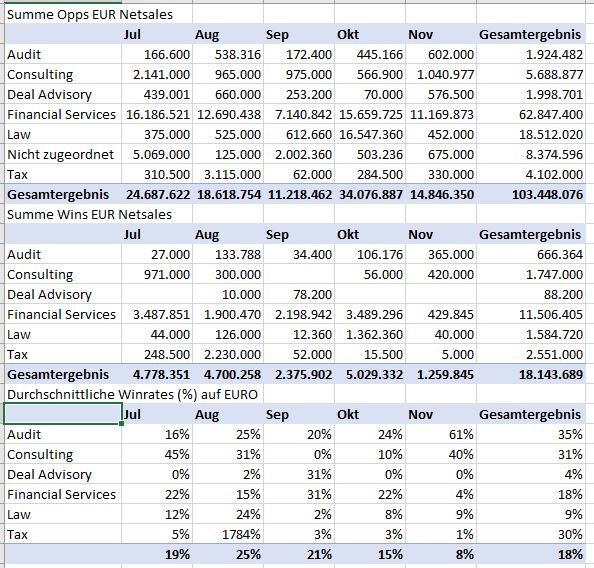

In [24]:
#pivot_table = pd.pivot_table(df)

In [30]:
df['Date_Opp_Creation']

0      17.07.2019
1      24.07.2019
2      31.07.2019
3      29.07.2019
4      05.07.2019
          ...    
798    15.08.2019
799    28.10.2019
800    27.09.2019
801    02.10.2019
802    26.09.2019
Name: Date_Opp_Creation, Length: 803, dtype: object

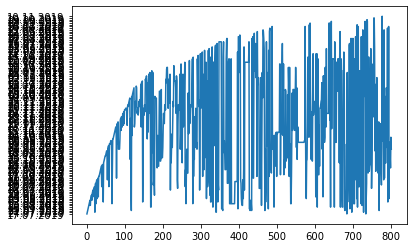

In [31]:
plt.plot(df['Date_Opp_Creation'])

In [32]:
pd.pivot_table(df,index=['Service_Solution'],values=['EUR_NetSales'])

,EUR_NetSales
Service_Solution,
Audit,48166.226190
Consulting,145756.680816
Deal Advisory,116435.050000
Financial Services,129705.455669
Law,253000.270270
Nicht zugeordnet,359149.833333
Tax,55360.000000


In [38]:
df[('EUR_NetSales')].sum() / 1000000 # 108 Mio ... das stimmt wohl

108.87774734

In [39]:
grouped = df.groupby(['Service_Solution'])

In [41]:
grouped.sum()

,EndCl_Nr,Debitor,Opp_Nr,Anzahl_Opp,EUR_NetSales,EUR_Actuals,FC_current_FY
Service_Solution,,,,,,,
Audit,5562713978,5562622570,3151719398,42,2022981.50,319643.95,4.535820e+05
Consulting,2962969324,2962971814,3676985621,49,7142077.36,640125.00,1.552605e+06
Deal Advisory,1202160883,1202160883,1500822095,20,2328701.00,91452.50,4.109290e+05
Financial Services,40399279297,40394056419,38870591033,508,65890371.48,4306015.90,2.267085e+07
Law,4495674723,4489839533,5552935493,74,18722020.00,681197.06,5.971629e+05
Nicht zugeordnet,1441156583,1441156583,1800987491,24,8619596.00,0.00,3.525000e+05
Tax,4622324948,4611303973,5702910397,75,4152000.00,358369.10,1.013318e+06
